In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

### Exemplo 1

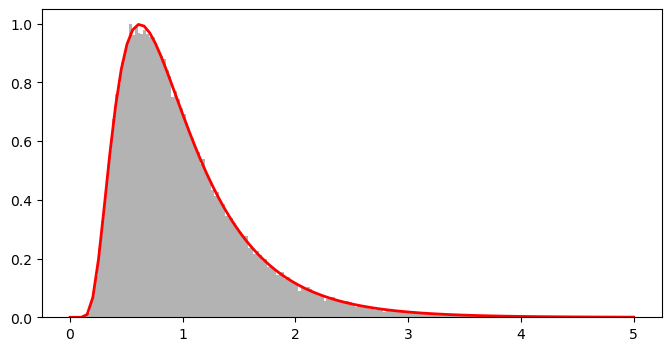

In [10]:
x = rd.wald(1,3,(100000))

# faço o histograma com 5 intervalos com 200 amostras cada das 100000 amostras 
hx, b = np.histogram(x, np.linspace(0, 5, 201), density=True)

b = (b[:-1] + b[1:])/2.0
t = np.linspace(0+1e-6, 5, 100)
fx = np.sqrt(3/(2*np.pi*t**3))*np.exp(-3*(t-1)**2/(2*t))
plt.figure(figsize=(8,4))
plt.bar(b, hx, width=0.025, color=[0.7,0.7,0.7])
plt.plot(t, fx, 'r', linewidth=2)
plt.show()

In [11]:
hx, b = np.histogram(x, np.linspace(0, 5, 201), density=True)
print(hx.shape)
print(b.shape)

# Como array hx tem 200 amostras e array de bins (b) tem 201 amostras é necessário quantificar no meio dos intervalos, ou seja, fazer: 
b = (b[:-1] + b[1:])/2.0
print(b.shape)

# Pego nos valores de bins sem contar com o último valor - fim dos intervalos
# Pego nos valores de bins sem contar com o primeiro valor - inicio dos intervalos
# Somo ponto a ponto os valores e divido por 2 para obter a média dos valores por cada intervalo



(200,)
(201,)
(200,)


### Exemplo 2

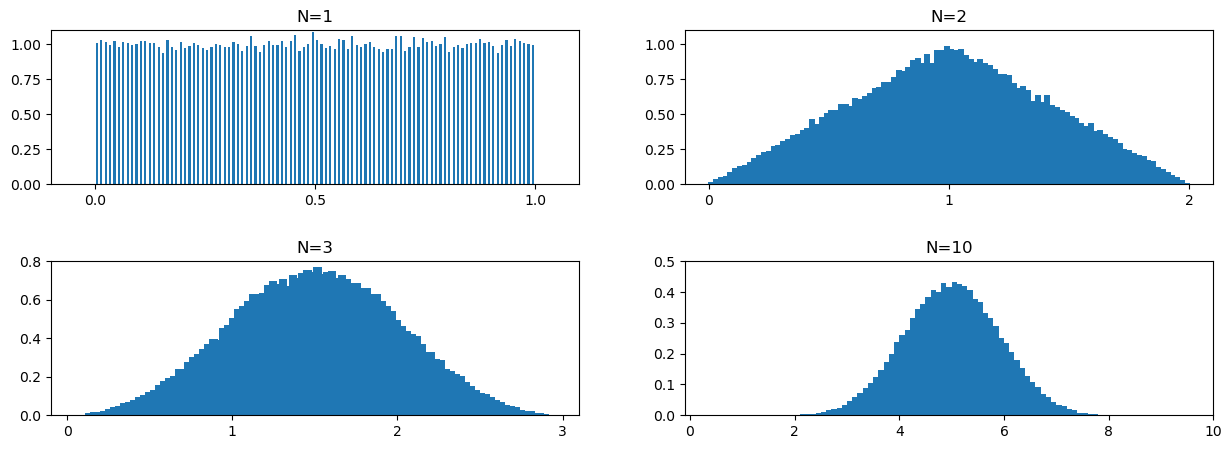

In [14]:
plt.close()

N = 100000
x1 = rd.rand(N) # gera 100000 amostras distribuidas de forma uniforme entre [0,1] (1D)
x2 = np.sum(rd.rand(2, N), axis=0) # gera um array com 2 linhas e N colunas, ou seja, 2x100000 amostras numa matriz (2x100000) distribuidas de forma uniforme entre [0,1] (2D). Depois somo os pontos da primeira linha com os da segunda linha, resultanto apenas um array 1D com 100000 amostras. 
x3 = np.sum(rd.rand(3, N), axis=0)
x4 = np.sum(rd.rand(10, N), axis=0)

hx, b = np.histogram(x1, np.linspace(0, 1, 101), density=True)
b = (b[1:] + b[:-1])/2.0

plt.figure(figsize=(   15, 5))
plt.subplot(221)
plt.axis([-0.1, 1.1, 0, 1.1])
plt.title('N=1')
plt.bar(b[0:100], hx, width=0.005)
plt.xticks([0, 0.5, 1])


hx, b = np.histogram(x2, np.linspace(0, 2, 101), density=True)
b = (b[1:] + b[:-1])/2.0

plt.subplot(222)
plt.axis([-0.1, 2.1, 0, 1.1])
plt.title('N=2')
plt.bar(b[0:100], hx, width=0.025)
plt.xticks(np.arange(3))


hx, b = np.histogram(x3, np.linspace(0, 3, 101), density=True)
b = (b[1:] + b[:-1])/2.0

plt.subplot(223)
plt.axis([-0.1, 3.1, 0, 0.8])
plt.title('N=3')
plt.bar(b[0:100], hx, width=0.05)
plt.xticks(np.arange(4))


hx, b = np.histogram(x4, np.linspace(0, 10, 101), density=True)
b = (b[1:] + b[:-1])/2.0

plt.subplot(224)
plt.axis([-0.1, 10, 0, 0.5])
plt.title('N=10')
plt.bar(b[0:100], hx, width=0.1)
plt.xticks(np.arange(0, 11, 2))

plt.subplots_adjust(hspace=0.5)

In [13]:
x = rd.rand(2, 5)
print(x)

[[0.49014574 0.23289437 0.4964853  0.226149   0.16380324]
 [0.71162189 0.18744547 0.79946295 0.66958171 0.65808695]]


### Exemplo 3

Text(0.5, 0, '$x_2$')

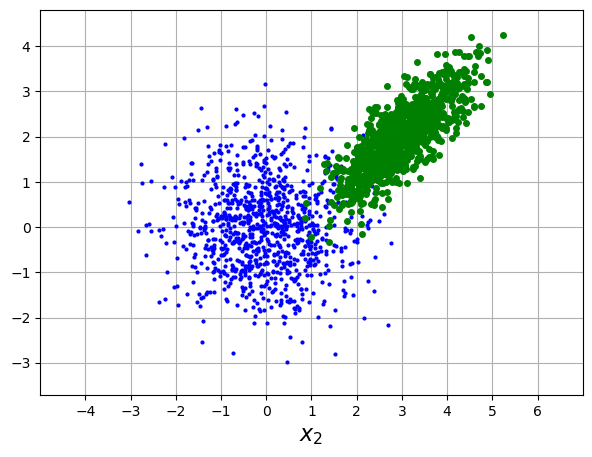

In [22]:
# Representação matricial de dados
# Transformar dados de um dataset para um np.array

A=np.array([[1./3/np.sqrt(2.),1./np.sqrt(2.)], [-1./np.sqrt(2.)/3,1./np.sqrt(2.)]])
b = np.array([3, 2])

# Criar 1000 pontos com uma distribuição normal
np.random.seed(0)
X = np.random.randn(2,1000)

# Para somar b é preciso transpor o vetor X e, posteriormente, voltar a transpo-lo
# Alternativamente, Y = np.dot(A, X) + b[:, np.newaxis]
Y= (np.dot(A,X).T + b).T
Y = np.dot(A, X) + b[:, np.newaxis]

plt.figure(figsize=(7,5))
plt.plot(X[0,:], X[1,:], ".b", markersize=4)
plt.plot(Y[0,:], Y[1,:], "og", markersize=4)
plt.axis('equal')
plt.axis([-5, 7, -4, 5.1])
plt.grid()
plt.xticks(np.arange(-4,7))
plt.xlabel('$x_1$', fontsize=16)
plt.xlabel('$x_2$', fontsize=16)

In [24]:
print("Média:\n ",np.mean(X, axis=1))
print("Cov:\n ", np.cov(X)) # matriz de covariancia do X

# A média não é igual a 0 e a matriz de covariancia 
# nas diagonais não é igual a 1 porque temos um número 
# finito de dados. Caso tivessemos um número infinito a 
# média dos dados seria 0 e as diagonais da matriz de 
# covariancia seriam 1 

Y = np.dot(A, X) + b[:,np.newaxis]
my = np.mean(Y,axis=1) # média de Y ao longo de 1 eixo
Yn = Y - my[:, np.newaxis]
C1 = np.cov(Y)
C2 = np.dot(Yn, Yn.T)/999.
print(C1)
print(C2)

Média:
  [-0.04525671  0.01361694]
Cov:
  [[ 0.97520967 -0.03013964]
 [-0.03013964  0.93827203]]
[[0.51326778 0.4149577 ]
 [0.4149577  0.53336087]]
[[0.51326778 0.4149577 ]
 [0.4149577  0.53336087]]


In [23]:
# Alternativa para cálculo da matriz de covariancia
# cov = sumatório[(vetor Y - a sua média)*(vetor Y - a sua média).T]

Yn = (Y.T - np.mean(Y, 1)).T
np.dot(Yn, Yn.T)/999.


array([[0.51326778, 0.4149577 ],
       [0.4149577 , 0.53336087]])

### Exemplo 4

In [6]:
import scipy.linalg as la

X2 = rd.rand(2,1000)
m = np.mean(X2, axis=1)
S = np.cov(X2)

X2 = X2-m[:, np.newaxis]

A = la.inv(la.sqrtm(S))

X2 = np.dot(A, X2)
np.cov(X2)


array([[1.00000000e+00, 4.40088406e-17],
       [4.40088406e-17, 1.00000000e+00]])